# Salary Project :- DataTrained | Practice Project_2


## Problem Statement:

#### Predict the salary if the employee using the features provided in the data

##### Submitted by: Shahla M

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [2]:
#Viewing data from Github

data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:


# checking total no of rows and columns 

data.shape



(397, 6)

In [4]:
#checking null and datatype of features and label

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [5]:
#checking categories of all categorical features

print(data["rank"].value_counts())
print(data["discipline"].value_counts())

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
B    216
A    181
Name: discipline, dtype: int64


Total 2 categorical columns are present in the dataset which are rank and discipline.

Now encoded the categorical features by get_dummies

## Encoding:
##### Encoding technique: OrdinalEncoder, feature: rank
##### Encoding technique: get_dummies, feature: discipline

In [6]:
# encoded the categorical features

# rank
r= ["AssocProf", "AsstProf", "Prof"]
from sklearn.preprocessing import OrdinalEncoder
ord= OrdinalEncoder(categories= [r])
ord.fit(data [["rank"]])
data_rank= pd.DataFrame(ord.transform(data [["rank"]]))


#discipline
data_discipline= pd.get_dummies(data[["discipline"]])


data= pd.concat ([data_rank, data_discipline, data], axis=1)

In [7]:
#Drop the unnecessary columns and rename the columns

data.drop(columns= ["rank", "discipline", "sex"], axis=1, inplace= True)
data.columns= ["Rank", 'discipline_A', 'discipline_B', 'yrs.since.phd', 'yrs.service','salary']
data

,Rank,discipline_A,discipline_B,yrs.since.phd,yrs.service,salary
0,2.0,0,1,19,18,139750
1,2.0,0,1,20,16,173200
2,1.0,0,1,4,3,79750
3,2.0,0,1,45,39,115000
4,2.0,0,1,40,41,141500
...,...,...,...,...,...,...
392,2.0,1,0,33,30,103106
393,2.0,1,0,31,19,150564
394,2.0,1,0,42,25,101738
395,2.0,1,0,25,15,95329


In [8]:
# View different statistical data

data.describe()

,Rank,discipline_A,discipline_B,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.455919,0.544081,22.314861,17.614610,113706.458438
std,0.757486,0.498682,0.498682,12.887003,13.006024,30289.038695
min,0.000000,0.000000,0.000000,1.000000,0.000000,57800.000000
25%,1.000000,0.000000,0.000000,12.000000,7.000000,91000.000000
50%,2.000000,0.000000,1.000000,21.000000,16.000000,107300.000000
75%,2.000000,1.000000,1.000000,32.000000,27.000000,134185.000000
max,2.000000,1.000000,1.000000,56.000000,60.000000,231545.000000


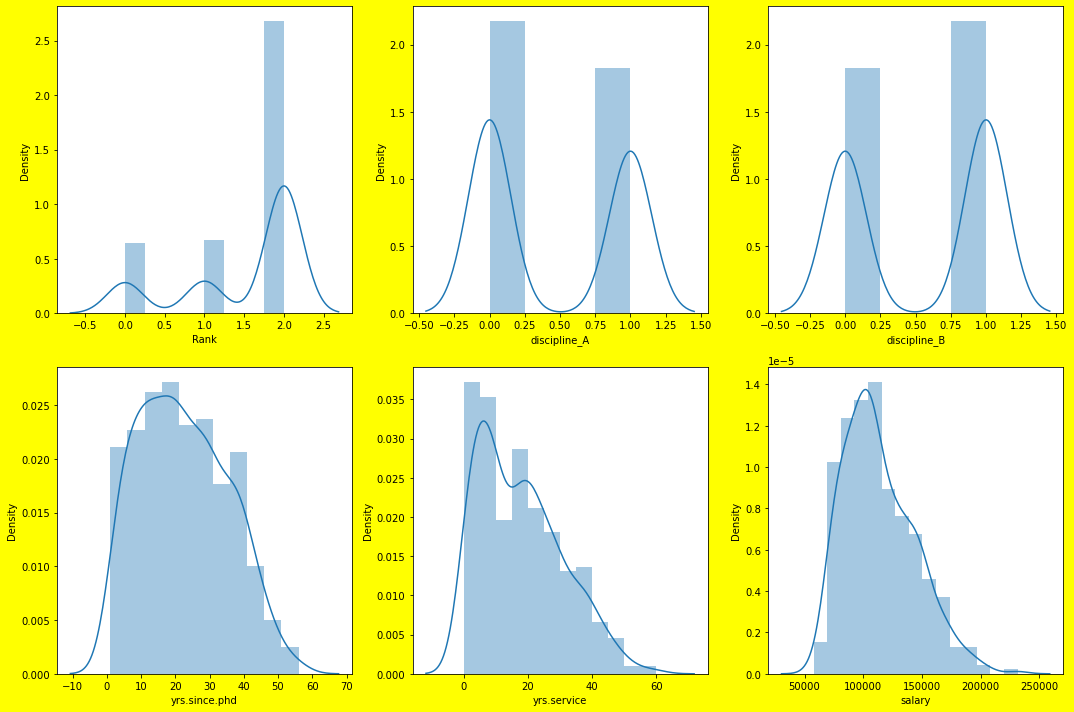

In [9]:
#checking skewness for phd, service, salary

plt.figure(figsize=(15,10),facecolor='yellow')
plno=1
for x in data:
    if plno<=6:
        plt.subplot(2,3,plno)
        sns.distplot(data[x])
        plt.xlabel (x, fontsize=10)
    plno +=1
plt.tight_layout()


Observations:

  1.  rank , discipline_A and discipline_B are discrete data.
  2.  No null value.
  3.  Seems yrs.service has Zero value in dataset.
  4.  Overall data are not properly distributed.
   5. Data has a lot of variance.



In [10]:
data["yrs.service"]= data["yrs.service"].replace(0, data["yrs.service"].mean())

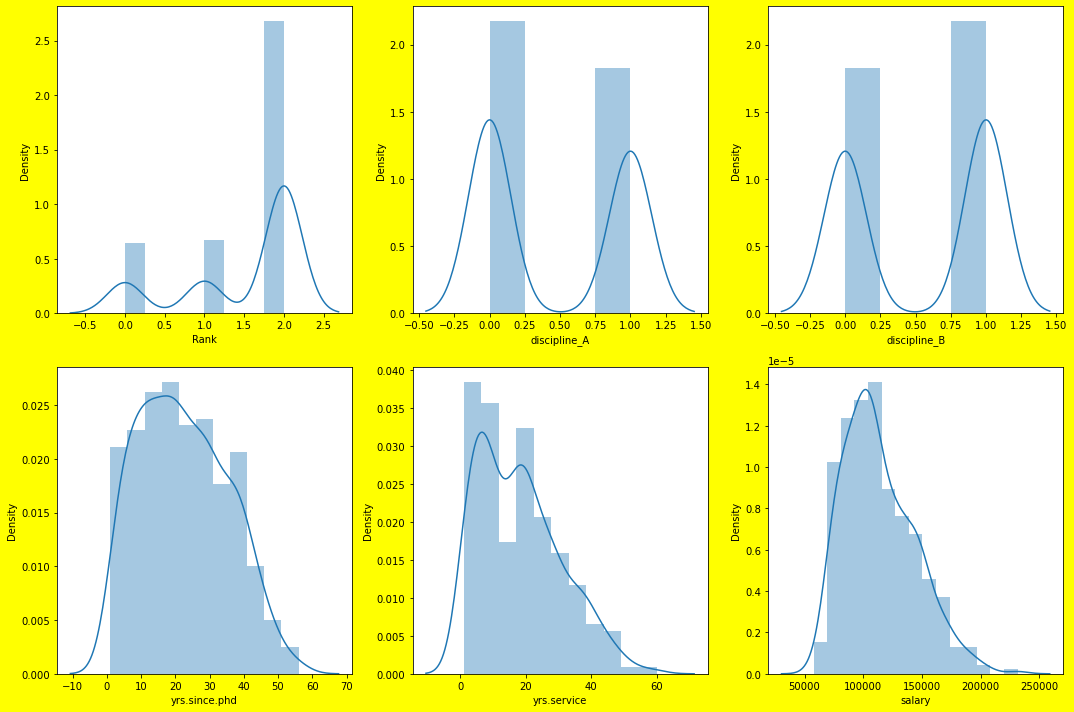

In [11]:
#checking skewness for phd, service

plt.figure(figsize=(15,10),facecolor='yellow')
plno=1
for x in data:
    if plno<=6:
        plt.subplot(2,3,plno)
        sns.distplot(data[x])
        plt.xlabel (x, fontsize=10)
    plno +=1
plt.tight_layout()



After applying log trasformation or any other transformation on features we get -infinite and null values in (.describe()) method.

There exists skewness in target variable also. But the target variable is needs to be unchanged.


In [12]:
#data["yrs.since.phd"]= np.log(data["yrs.since.phd"])
#data["yrs.service"]= np.log(data["yrs.service"])


#data.describe()

In [13]:
from sklearn.preprocessing import PowerTransformer
scaler= PowerTransformer (method= 'box-cox')
features= ["yrs.since.phd", "yrs.service" ]
data[features] =scaler.fit_transform(data[features].values)
data[features]

,yrs.since.phd,yrs.service
0,-0.122943,0.211085
1,-0.045296,0.059229
2,-1.632923,-1.443109
3,1.559572,1.422753
4,1.275438,1.515799
...,...,...
392,0.852389,0.965949
393,0.725067,0.283399
394,1.390710,0.677405
395,0.321691,-0.020790


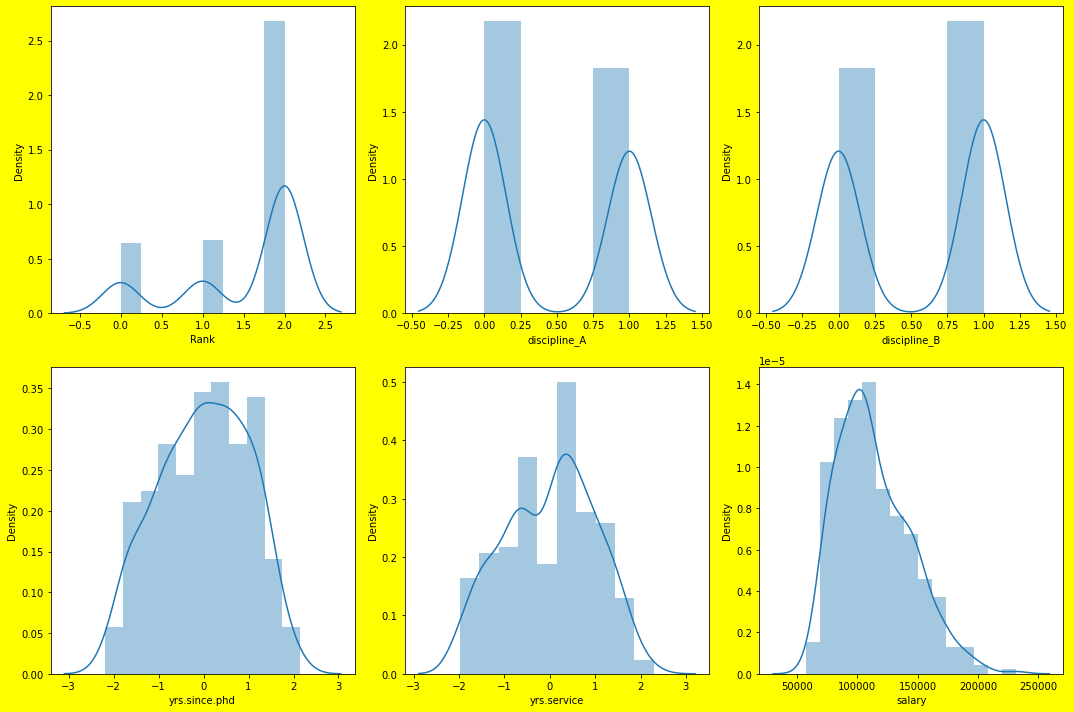

In [14]:
#checking skewness for phd,service

plt.figure(figsize=(15,10),facecolor='yellow')
plno=1
for x in data:
    if plno<=6:
        plt.subplot(2,3,plno)
        sns.distplot(data[x])
        plt.xlabel (x, fontsize=10)
    plno +=1
plt.tight_layout()

#### Spliting features and lable of the given dataset

In [15]:
# differentiate features and lable from our dataset

x= data.drop(columns=['salary'])
y= data['salary']

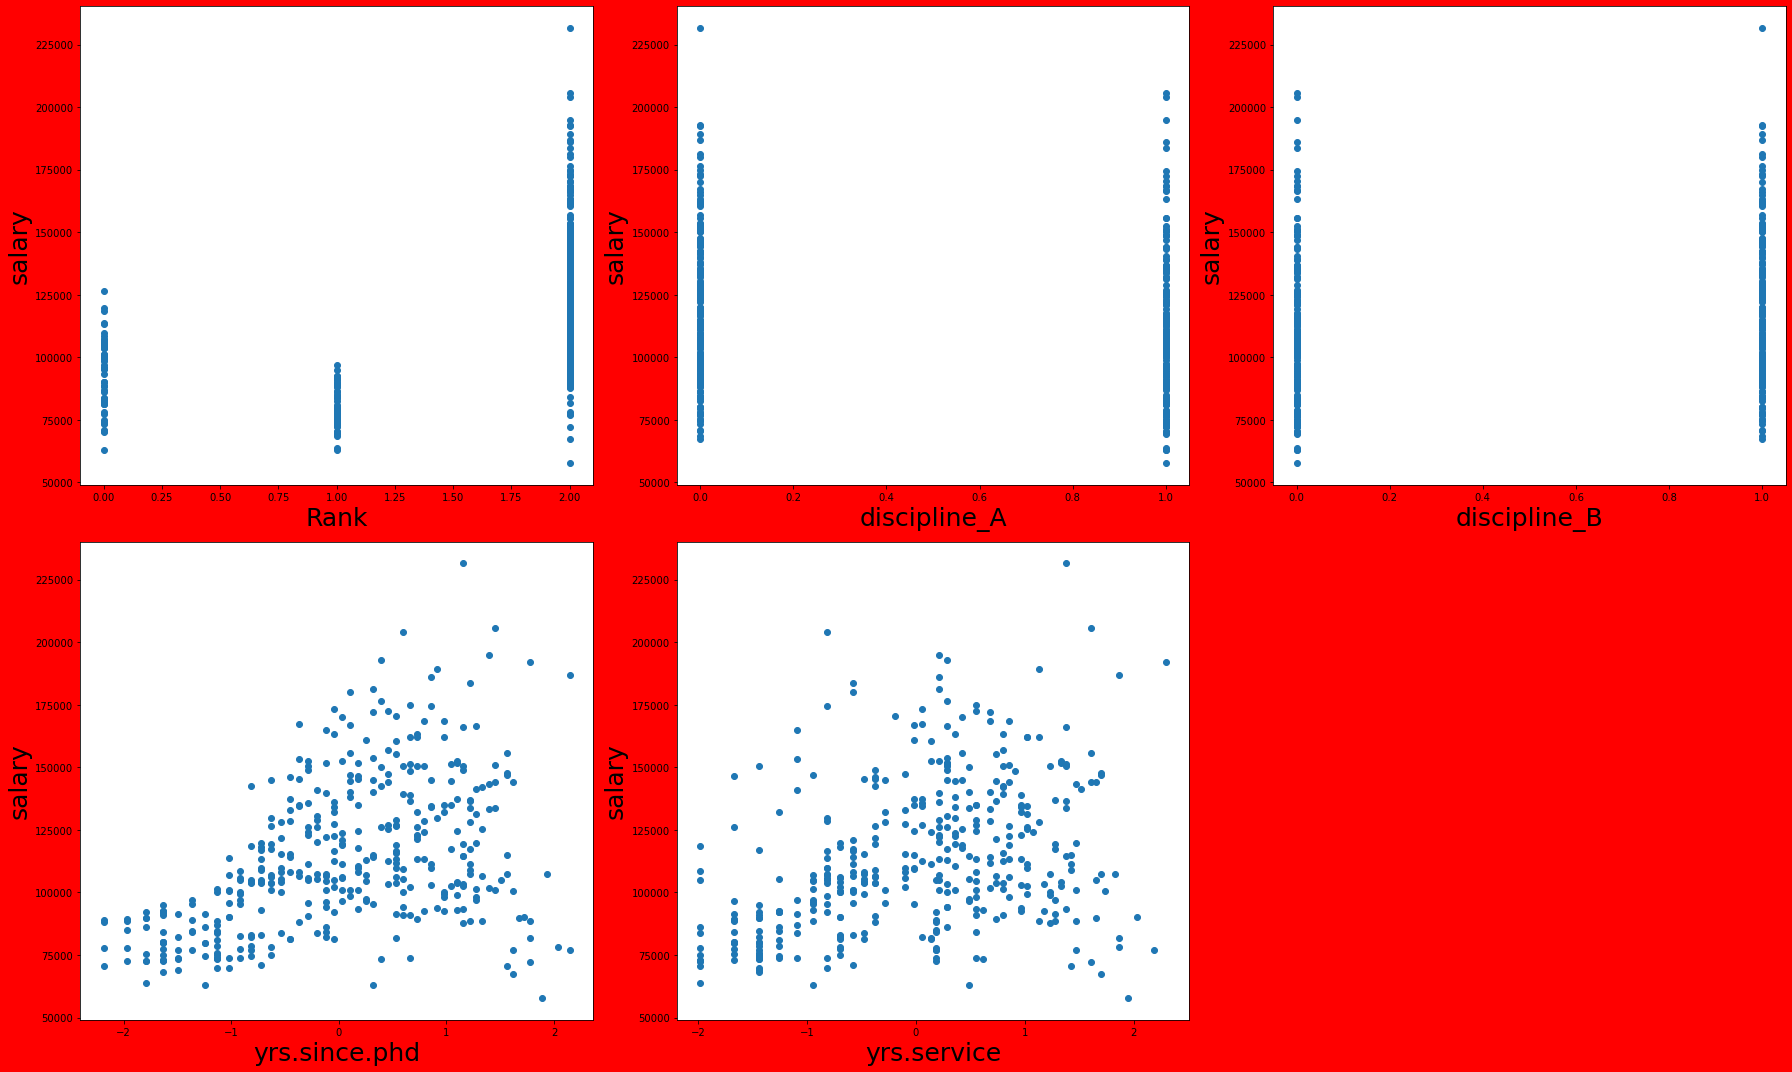

In [16]:
#checking the dependency of label with respect to every features

plt.figure(figsize=(25,15),facecolor='red')
plno=1
for col in x:
    if plno<=5:
        plt.subplot(2,3,plno)
        plt.scatter(x[col],y)
        plt.xlabel (col, fontsize=25)
        plt.ylabel ('salary', fontsize=25)
    plno +=1
plt.tight_layout()

yrs.since.phd and yrs.service are not well defined in shape and have no proper relationship with target variable.
The dataset itself has a lot of variance.

In [18]:
#split the data for training and testing

x_train, x_test, y_train,y_test=train_test_split(x,y,test_size= 0.25, random_state=150)

### Training and Testing :

In [19]:
# import Linear Regression, DT, KNN, RF to make a ML Model for our regression problem

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

#train every algo with our training dataset

reg= LinearRegression()
dt= DecisionTreeRegressor()
knn= KNeighborsRegressor()
rf = RandomForestRegressor()

reg.fit(x_train,y_train)
dt.fit(x_train,y_train)
knn.fit(x_train,y_train)
rf.fit(x_train,y_train)
print ("Model is trained")

Model is trained


In [21]:
#check how well the model fits on our train data

#print adjusted r2 score

from sklearn import metrics

print ("Adjusted R2 Score for training after applying Linear Regression is:" ,reg.score(x_train,y_train))
print ("Adjusted R2 Score for training after applying Decision Tree is:", dt.score(x_train,y_train))
print ("Adjusted R2 Score for training after applying KNN is:", knn.score(x_train,y_train))
print ("Adjusted R2 Score for training after applying Random Forest is:", rf.score(x_train,y_train))

Adjusted R2 Score for training after applying Linear Regression is: 0.38273982521837
Adjusted R2 Score for training after applying Decision Tree is: 0.9150438917809145
Adjusted R2 Score for training after applying KNN is: 0.610552250696248
Adjusted R2 Score for training after applying Random Forest is: 0.8394831783411857


Decision Tree and Random Forest has better R2 score on training data.

In [36]:
#check how well the model fits on our test data

#adjusted r2 score

print ("Adjusted R2 Score for testing after applying Linear Regression is:" ,reg.score(x_test,y_test))
print ("Adjusted R2 Score for testing after applying Decision Tree is", dt.score(x_test,y_test))
print ("Adjusted R2 Score for testing after applying KNN is:", knn.score(x_test,y_test))
print ("Adjusted R2 Score for testing after applying Random Forest is:", rf.score(x_test,y_test))

Adjusted R2 Score for testing after applying Linear Regression is: 0.3301100461220222
Adjusted R2 Score for testing after applying Decision Tree is -0.1518128006652324
Adjusted R2 Score for testing after applying KNN is: 0.44415575096977034
Adjusted R2 Score for testing after applying Random Forest is: 0.45343827291532335




For KNN the variation of R2 score of train data and test data is better than all others.

So it is seems that the best model for this dataset is KNN.


In [23]:
y_pred= knn.predict(x_test)
y_pred

array([ 99651.4,  82671. , 103776.8, 116956. , 129434.4, 145475.6,
       146144. , 123289.8, 122786.2, 106606.4, 123901.8, 148725. ,
       106703. , 136751.8, 134367.2, 128735.2, 135518.2, 124363.8,
       123061.6, 129863.6, 125042.4,  75155.4,  75155.4, 125042.4,
       115321.8,  99657.8,  78818.2, 146255. ,  83600.2, 129719.4,
        72359.2,  85349.6,  85356.8, 100750.4, 137559.2, 151466.8,
       142640.2, 129863.6,  94770.4, 111810.4, 100079. , 137331.6,
        83600.2, 121553. , 125288.8, 106287.8, 109728.8, 149823.8,
        80327.2,  83959. , 112720.8, 108578. , 155079.6, 122457.2,
       124737.8, 121183.2,  83529.2, 119040. , 127350.8,  83692.8,
        75155.4, 151466.8,  75116.2, 149823.8,  84446.6,  83600.2,
        73071.2, 148787.6, 129504.6, 111547. ,  85349.6, 137315. ,
       109527.6,  89960. , 111051. , 162921.4, 105193. ,  78818.2,
        75106.8, 100079. , 102002. , 144112.2, 115321.8, 131833. ,
       105396.6, 105897.4, 126173. ,  82671. , 106078. , 13509

#### Visualize

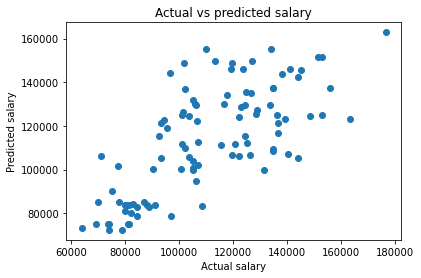

In [24]:
#plot and visualize the variation of actual and predicted test data

plt.scatter (y_test, y_pred)
plt.xlabel('Actual salary')
plt.ylabel('Predicted salary')
plt.title('Actual vs predicted salary')
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print ("MSE", mean_squared_error(y_test, y_pred))
print ("MAE", mean_absolute_error(y_test, y_pred))
print("RMSE", np.sqrt (mean_squared_error(y_test,y_pred)))

MSE 342295898.6128
MAE 14079.832
RMSE 18501.240461460955


This KNN algorithm is not good for this dataset because the test score is very low.

Let's apply some more technique to choose the best one.

## AdaBoost

In [26]:
#AdaBoost Model training

from sklearn.ensemble import AdaBoostRegressor
ada= AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred_train = ada.predict(x_train)

In [27]:
#accuracy score for training

from sklearn import metrics

accuracy = metrics.r2_score(y_train, y_pred_train)
print ("Accuracy for training dataset is:", accuracy)

Accuracy for training dataset is: 0.4752977556497494


In [28]:
#accuracy score for testing

y_pred_test=ada.predict(x_test)
accuracy = metrics.r2_score(y_test, y_pred_test)
print ("Accuracy for test dataset is:", accuracy)

Accuracy for test dataset is: 0.48316846525138224


After applying the AdaBoost Regressor, we can find that the accuracy has slightly increased. Let's Apply some hyperparameter tuning to get a better result.

## Hyperparameter Tuning :
Let's apply RandomizedSearch CV method for hyperparameter tuning.

#### RandomizedSearch Cross Validation

In [29]:
from sklearn.model_selection import RandomizedSearchCV

# initializing parameters for CV

params= {'n_estimators':[45,35,85,20], "learning_rate":[0.25,0.2,0.3,0.4,0.15]}

In [30]:
rndcv= RandomizedSearchCV(AdaBoostRegressor(),cv=10, param_distributions= params)

#training the algo

rndcv.fit(x_train,y_train) 

RandomizedSearchCV(cv=10, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.2, 0.3, 0.4,
                                                          0.15],
                                        'n_estimators': [45, 35, 85, 20]})

In [31]:
#calculating best parameters for this particular dataset.

rndcv.best_estimator_

AdaBoostRegressor(learning_rate=0.2, n_estimators=35)

### Apply learning_rate=0.22, n_estimators=20

In [32]:
#for learning_rate=0.15, n_estimators=20

#applying best parameters on AdaBoostRegressor()

ada= AdaBoostRegressor(learning_rate=0.15, n_estimators=20, random_state= 200) 
ada.fit(x_train,y_train)
y_pred= ada.predict(x_test)

print("Accuracy score of test data after applying AdaBoost with Hyperparameter tuning is:", metrics.r2_score(y_test, y_pred)*100,"%")

Accuracy score of test data after applying AdaBoost with Hyperparameter tuning is: 49.1582617698447 %


Now putting different values of learning_rate and n_estimators manually ,the best probable learning_rate is 0.22 and n_estimators is 20

In [33]:
#for learning_rate=0.22, n_estimators=20 we get the best result.

#applying best parameters on AdaBoostRegressor()

ada= AdaBoostRegressor(learning_rate=0.22, n_estimators=20, random_state=200) 
ada.fit(x_train,y_train)
y_pred= ada.predict(x_test)

print("Accuracy score of test data after applying AdaBoost with Hyperparameter tuning is:", metrics.r2_score(y_test, y_pred)*100,"%")

Accuracy score of test data after applying AdaBoost with Hyperparameter tuning is: 49.733178562761374 %


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print ("MSE", mean_squared_error(y_test, y_pred))
print ("MAE", mean_absolute_error(y_test, y_pred))
print("RMSE", np.sqrt (mean_squared_error(y_test, y_pred)))

MSE 309549425.83804625
MAE 12964.153847062926
RMSE 17594.016762469175


### Due to lots of variance the accuracy is very less as compared
AdaBoost would be the best probable algorithm for this dataset.